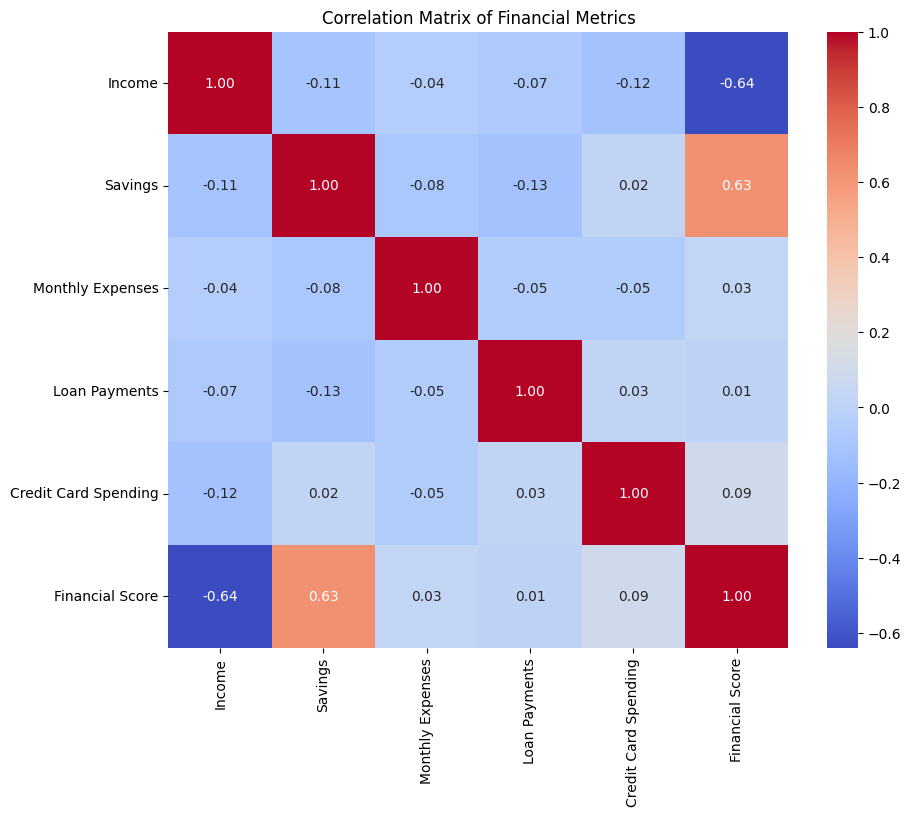

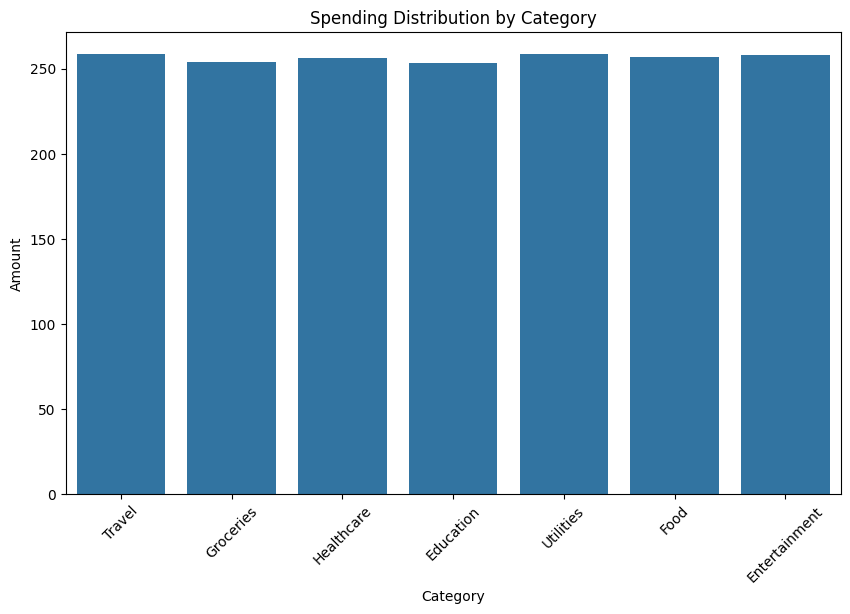

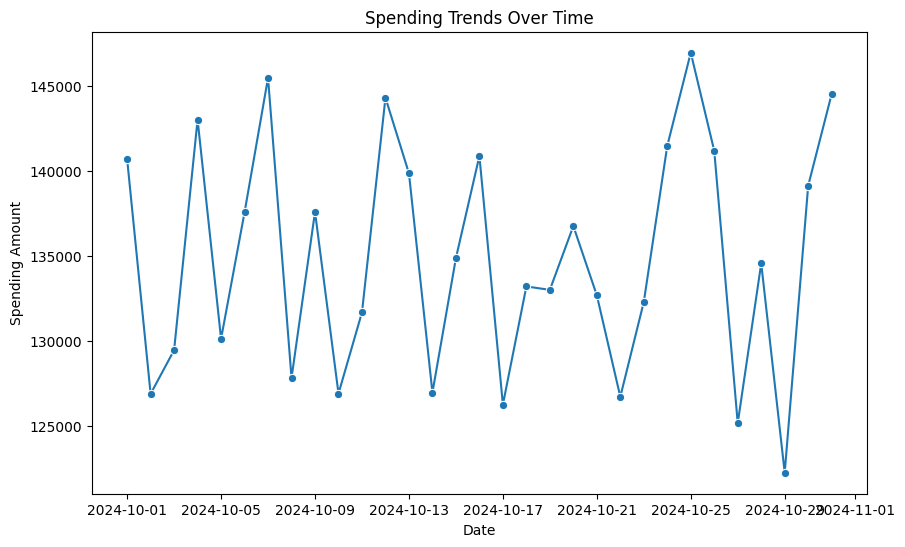

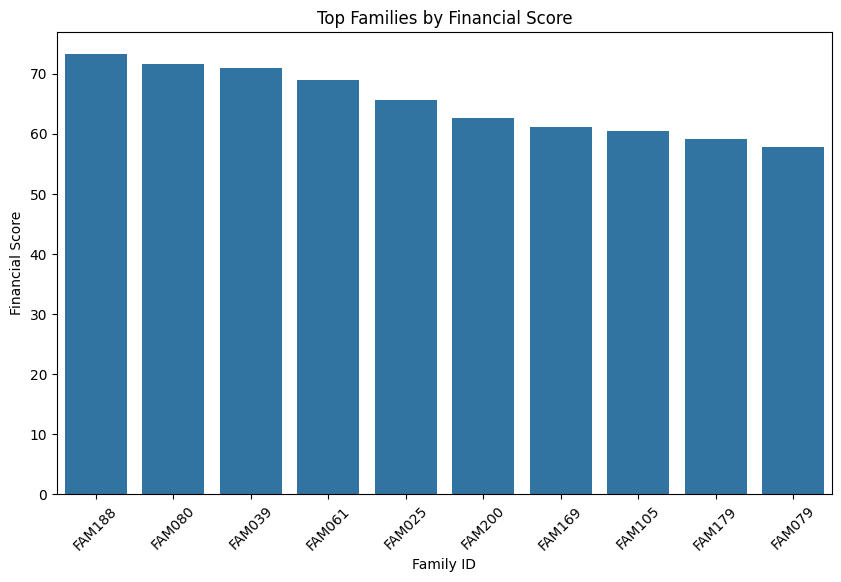

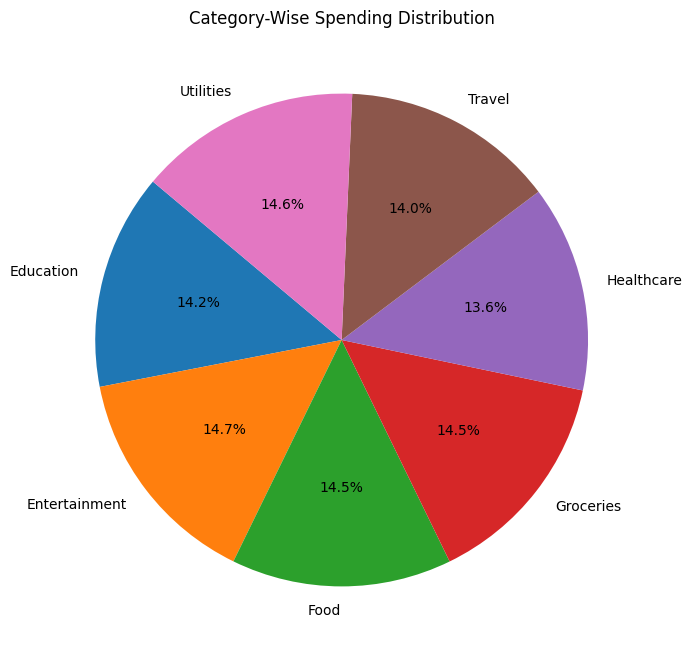

Simulated Financial Score: 31.38623252705075
Recommendation: Increase savings and reduce discretionary spending to improve your financial health.


In [23]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.io as pio
pio.renderers.default = 'jupyterlab'  # or 'jupyterlab' if you're using JupyterLab

# Configure backends for visualizations
%matplotlib inline
import plotly.io as pio
pio.renderers.default = 'notebook'  # Ensure Plotly works in Jupyter Notebook

# Load Dataset
file_path = "dataset.xlsx"  # Replace with your dataset path
df = pd.read_excel(file_path)

# Data Cleaning
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Month'] = df['Transaction Date'].dt.month
df['Year'] = df['Transaction Date'].dt.year

# Add Spending-to-Income Ratio and Other Calculated Columns
df['Savings Ratio'] = df['Savings'] / df['Income']
df['Expenses Ratio'] = df['Monthly Expenses'] / df['Income']
df['Loan Ratio'] = df['Loan Payments'] / df['Income']

# Function to Calculate Financial Score
def calculate_financial_score(row):
    score = 0
    # Assign weights to each factor
    weights = {
        "Savings Ratio": 40,
        "Expenses Ratio": -30,
        "Loan Ratio": -20,
        "Credit Card Spending": -10,
        "Financial Goals Met (%)": 20
    }
    # Add/Subtract points based on thresholds
    score += weights["Savings Ratio"] * row['Savings Ratio']
    score -= weights["Expenses Ratio"] * row['Expenses Ratio']
    score -= weights["Loan Ratio"] * row['Loan Ratio']
    score -= weights["Credit Card Spending"] * (row['Credit Card Spending'] / row['Income'])
    score += weights["Financial Goals Met (%)"] * (row['Financial Goals Met (%)'] / 100)
    return max(0, min(100, score))  # Keep score in range [0, 100]

# Apply Financial Score Calculation
df['Financial Score'] = df.apply(calculate_financial_score, axis=1)

# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending', 'Financial Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Financial Metrics")
plt.show()


# Spending Distribution by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Amount', data=df, errorbar=None)
plt.title("Spending Distribution by Category")
plt.xticks(rotation=45)
plt.show()

# Spending Trends Over Time
time_series_data = df.groupby('Transaction Date')['Amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_series_data, x='Transaction Date', y='Amount', marker='o')
plt.title("Spending Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Spending Amount")
plt.show()

# Top Families by Financial Score
family_scores = df.groupby('Family ID')['Financial Score'].mean().reset_index()
top_families = family_scores.nlargest(10, 'Financial Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Family ID', y='Financial Score', data=top_families, errorbar=None)
plt.title("Top Families by Financial Score")
plt.xticks(rotation=45)
plt.show()

# Matplotlib Pie Chart as an Alternative
category_spending = df.groupby('Category')['Amount'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(
    category_spending['Amount'], 
    labels=category_spending['Category'], 
    autopct='%1.1f%%', 
    startangle=140
)
plt.title("Category-Wise Spending Distribution")
plt.show()


# Interactive Simulation for Financial Improvements (Bonus Task)
def simulate_new_score(savings, monthly_expenses, loan_payments, credit_card_spending):
    # Simulate a row with new values
    simulated_row = {
        'Savings Ratio': savings / df['Income'].mean(),
        'Expenses Ratio': monthly_expenses / df['Income'].mean(),
        'Loan Ratio': loan_payments / df['Income'].mean(),
        'Credit Card Spending': credit_card_spending,
        'Income': df['Income'].mean(),
        'Financial Goals Met (%)': 80  # Assume financial goals improve
    }
    return calculate_financial_score(simulated_row)

# Example Simulation
new_savings = 30000
new_expenses = 5000
new_loan_payments = 1000
new_credit_card_spending = 2000

simulated_score = simulate_new_score(new_savings, new_expenses, new_loan_payments, new_credit_card_spending)
print(f"Simulated Financial Score: {simulated_score}")

# Recommendations Based on Simulated Score
if simulated_score < 50:
    print("Recommendation: Increase savings and reduce discretionary spending to improve your financial health.")
elif simulated_score < 75:
    print("Recommendation: You're doing well, but consider reducing debt and credit card spending further.")
else:
    print("Great job! Keep maintaining your financial discipline.")
